In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np

# Reading csv file using pandas library

In [2]:
data=pd.read_csv('Final_laptop.csv')

In [3]:
data.head()

,Brand,Ram,Hdd,Price,Processor,Gen
0,Acer,4,128,35354.0,i3,1
1,Acer,8,1TB,66614.0,i7,1
2,Acer,4,256,35512.0,AMD,1
3,Acer,8,1TB,58425.0,i7,1
4,Acer,4,1TB,47087.0,i3,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2598 entries, 0 to 2597
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Brand      2598 non-null   object 
 1   Ram        2593 non-null   object 
 2   Hdd        2593 non-null   object 
 3   Price      2379 non-null   float64
 4   Processor  2596 non-null   object 
 5   Gen        2598 non-null   object 
dtypes: float64(1), object(5)
memory usage: 121.9+ KB


# removing rows containing nan in ram column

In [5]:
data.drop(data[data['Ram'].isnull()==True].index,inplace=True,axis=0)

In [6]:
data.isnull().sum()

Brand          0
Ram            0
Hdd            0
Price        214
Processor      0
Gen            0
dtype: int64

In [7]:
data['Ram'].unique()

array(['4', '8', '1', '16', '2', '6', '512', '0', '12', '24', '32',
       'Intel HD', '256', '128', '3', '1 TB ',
       'Integrated Intel Graphics', '500'], dtype=object)

# Data Preprocessing

In [8]:
print(data[data['Ram']=='4'].isnull().sum())
data[data['Ram']=='4']

Brand         0
Ram           0
Hdd           0
Price        60
Processor     0
Gen           0
dtype: int64


,Brand,Ram,Hdd,Price,Processor,Gen
0,Acer,4,128,35354.0,i3,1
2,Acer,4,256,35512.0,AMD,1
4,Acer,4,1TB,47087.0,i3,1
5,Acer,4,128,27480.0,Pentium4,1
6,Acer,4,500,50315.0,i7,1
...,...,...,...,...,...,...
2584,Toshiba,4,500,35197.0,i3,1
2586,Vero,4,32,20472.0,Dual Core,1
2588,Wipro,4,1TB,NaN,i5,1
2592,Dell,4,320,NaN,i5,3


# we have 60 rows with null values in price column with ram being 4 , we replaced it with the median value for these null price columns

In [9]:
data[data['Ram']=='4'][data[data['Ram']=='4']['Price'].isnull()==True].index

Int64Index([  42,   50,   81,  110,  612,  654,  668,  672,  673,  676,  850,
             854,  861,  871,  872,  884,  895,  897,  900,  903,  922,  937,
             949,  953,  972,  987,  988,  994,  998, 1008, 1050, 1102, 1393,
            1419, 1442, 1459, 1462, 1470, 1471, 1582, 1852, 1853, 1903, 1925,
            1935, 1945, 2128, 2129, 2137, 2150, 2151, 2152, 2153, 2154, 2155,
            2161, 2520, 2588, 2592, 2597],
           dtype='int64')

In [10]:
data.loc[data[data['Ram']=='4'][data[data['Ram']=='4']['Price'].isnull()==True].index,'Price']=data[data['Ram']=='4']['Price'].median()

# Ram = "8 GB"


In [11]:
print(data[data['Ram']=='8'].isnull().sum())
data[data['Ram']=='8']

Brand        0
Ram          0
Hdd          0
Price        9
Processor    0
Gen          0
dtype: int64


,Brand,Ram,Hdd,Price,Processor,Gen
1,Acer,8,1TB,66614.0,i7,1
3,Acer,8,1TB,58425.0,i7,1
8,Acer,8,256,76929.0,i5,1
13,Acer,8,1TB,30630.0,i3,1
14,Acer,8,256,60630.0,i5,1
...,...,...,...,...,...,...
2573,Toshiba,8,500,63937.0,i7,1
2575,Toshiba,8,512,120787.0,i7,1
2577,Toshiba,8,256,70787.0,i7,1
2583,Toshiba,8,256,131653.0,i5,1


# we have 9 rows with price = "null" and ram = 8 , we replaced it with the median value for these null price columns

In [12]:
data.loc[data[data['Ram']=='8'][data[data['Ram']=='8']['Price'].isnull()==True].index,'Price']=data[data['Ram']=='8']['Price'].median()

# RAM = "1 gb"

In [13]:
print(data[data['Ram']=='1'].isnull().sum())
data[data['Ram']=='1']

Brand         0
Ram           0
Hdd           0
Price        46
Processor     0
Gen           0
dtype: int64


,Brand,Ram,Hdd,Price,Processor,Gen
7,Acer,1,128,NaN,Core2 Duo,1
269,Asus,1,320,130000.0,UNKNOWN,UNKNOWN
278,Asus,1,250,NaN,Core2 Duo,1
279,Asus,1,250,NaN,UNKNOWN,1
511,Asus,1,320,16265.0,UNKNOWN,UNKNOWN
651,Dell,1,40,NaN,Core2 Duo,1
658,Dell,1,60,NaN,Core2 Duo,1
659,Dell,1,80,NaN,Core2 Duo,1
845,Dell,1,40,NaN,Pentium4,1
847,Dell,1,80,NaN,Core2 Duo,1


# we are dropping the rows with ram=1 gb as it has 49 rows with 46 rows having null values in price column

# retrieving row index with ram="1 gb"

In [14]:
data[data['Ram']=='1'][data[data['Ram']=='1']['Price'].isnull()==True].index

Int64Index([   7,  278,  279,  651,  658,  659,  845,  847,  848,  849,  851,
             873,  878,  886,  893,  896,  899,  945,  989,  990,  991,  992,
             993,  997, 1000, 1003, 1052, 1357, 1424, 1469, 1472, 1473, 1474,
            1475, 1476, 1584, 1587, 1604, 1899, 1902, 2157, 2162, 2432, 2467,
            2581, 2593],
           dtype='int64')

# Dropping all the rows having null values in price column having ram = "1gb" using indexes

In [15]:
data.drop(data[data['Ram']=='1'][data[data['Ram']=='1']['Price'].isnull()==True].index,axis=0,inplace=True)

# RAM = "16 GB"

In [16]:
print(data[data['Ram']=='16'].isnull().sum())
data[data['Ram']=='16']

Brand        0
Ram          0
Hdd          0
Price        3
Processor    0
Gen          0
dtype: int64


,Brand,Ram,Hdd,Price,Processor,Gen
11,Acer,16,128 + 1TB,86535.0,i7,1
16,Acer,16,128 + 1TB,106220.0,i7,1
47,Acer,16,256 + 1TB,173149.0,AMD,1
56,Acer,16,512,149527.0,i7,1
63,Apple,16,Intel Iris Pro Graphics,140818.0,i7,4
...,...,...,...,...,...,...
2446,Toshiba,16,512,110472.0,i7,1
2459,Toshiba,16,512,203858.0,i7,1
2569,Toshiba,16,1TB,206693.0,i7,1
2580,Toshiba,16,1TB,192834.0,i7,1


In [17]:
data.loc[data[data['Ram']=='16'][data[data['Ram']=='16']['Price'].isnull()==True].index,'Price']=data[data['Ram']=='16']['Price'].median()

# RAM = "2 GB"

In [18]:
print(data[data['Ram']=='2'].isnull().sum())
data[data['Ram']=='2']

Brand         0
Ram           0
Hdd           0
Price        63
Processor     0
Gen           0
dtype: int64


,Brand,Ram,Hdd,Price,Processor,Gen
18,Acer,2,32,15669.0,AMD,1
46,Acer,2,32,21968.0,Dual Core,1
107,Apple,2,500,NaN,i3,1
117,Apple,2,250,NaN,Pentium4,1
135,Asus,2,500,20293.0,UNKNOWN,UNKNOWN
...,...,...,...,...,...,...
2579,Toshiba,2,16,15669.0,Dual Core,1
2582,Toshiba,2,500,31500.0,i5,UNKNOWN
2594,Lenovo,2,160,NaN,i5,1
2595,Lenovo,2,320,NaN,i5,2


In [19]:
data.loc[data[data['Ram']=='2'][data[data['Ram']=='2']['Price'].isnull()==True].index,'Price']=data[data['Ram']=='2']['Price'].median()

# RAM = "6 GB"

In [20]:
print(data[data['Ram']=='6'].isnull().sum())
data[data['Ram']=='6']

Brand        0
Ram          0
Hdd          0
Price        0
Processor    0
Gen          0
dtype: int64


,Brand,Ram,Hdd,Price,Processor,Gen
43,Acer,6,1TB,37716.0,i3,1
55,Acer,6,128 + 1TB,56614.0,i5,1
171,Asus,6,256,45433.0,i3,1
242,Asus,6,640,47490.0,i5,2
330,Asus,6,256,51890.0,i5,1
436,Asus,6,1 TB,31994.0,i3,5
473,Asus,6,1 TB,30990.0,i3,6
611,Chuwi,6,64,35354.0,UNKNOWN,1
627,Dell,6,1 TB,61999.0,i5,UNKNOWN
638,Dell,6,1TB,43228.0,i5,1


# RAM = "512MB"

In [21]:
print(data[data['Ram']=='512'].isnull().sum())
data[data['Ram']=='512']

Brand         0
Ram           0
Hdd           0
Price        19
Processor     0
Gen           0
dtype: int64


,Brand,Ram,Hdd,Price,Processor,Gen
114,Apple,512,80,NaN,Pentium4,1
623,Dell,512,80,NaN,Core2 Duo,1
632,Dell,512,40,NaN,Pentium4,1
633,Dell,512,60,NaN,Core2 Duo,1
684,Dell,512,160,NaN,Pentium4,1
685,Dell,512,160,NaN,Pentium4,1
798,Dell,512,80,NaN,Core2 Duo,1
844,Dell,512,80,NaN,Core2 Duo,1
883,Dell,512,160,NaN,Pentium4,1
887,Dell,512,160,NaN,Core2 Duo,1


# we are dropping all the rows with RAM= "512 mb" as all price columns have null values in price

In [22]:
data[data['Ram']=="512"][data[data['Ram']=='512']['Price'].isnull()==True].index

Int64Index([ 114,  623,  632,  633,  684,  685,  798,  844,  883,  887,  894,
             919,  952,  976, 1898, 1900, 1901, 2349, 2542],
           dtype='int64')

In [23]:
data.drop(data[data['Ram']=="512"][data[data['Ram']=='512']['Price'].isnull()==True].index,axis=0,inplace=True)

# RAM = '0 GB'

In [24]:
print(data[data['Ram']=='0'].isnull().sum())
data[data['Ram']=='0']

Brand        0
Ram          0
Hdd          0
Price        3
Processor    0
Gen          0
dtype: int64


,Brand,Ram,Hdd,Price,Processor,Gen
128,Assembled,0,0,NaN,Core2 Duo,1
2587,Wipro,0,0,NaN,UNKNOWN,1
2589,Wipro,0,0,NaN,0,1


# we practically dont have ram with 0 gb and it also contains null values in price so we are dropping all these rows

In [25]:
data.drop(data[data['Ram']=="0"][data[data['Ram']=='0']['Price'].isnull()==True].index,axis=0,inplace=True)

# RAM = "12 GB"

In [26]:
print(data[data['Ram']=='12'].isnull().sum())
data[data['Ram']=='12']

Brand        0
Ram          0
Hdd          0
Price        0
Processor    0
Gen          0
dtype: int64


,Brand,Ram,Hdd,Price,Processor,Gen
237,Asus,12,512 + 2TB,86535.0,i7,1
349,Asus,12,1TB,74724.0,i7,1
796,Dell,12,1TB,54645.0,i5,1
828,Dell,12,128 + 1TB,79449.0,i5,1
833,Dell,12,128 + 1TB,102283.0,i7,1
879,Dell,12,1TB,78661.0,i5,1
1432,Hp,12,1TB,133779.0,i7,1
1437,Hp,12,256 + 1TB,157401.0,i7,1
1498,Hp,12,1 TB,74000.0,i5,5
1499,Hp,12,1 TB,90190.0,i7,5


# RAM = "24 GB"

In [27]:
print(data[data['Ram']=='24'].isnull().sum())
data[data['Ram']=='24']

Brand        0
Ram          0
Hdd          0
Price        0
Processor    0
Gen          0
dtype: int64


,Brand,Ram,Hdd,Price,Processor,Gen
259,Asus,24,1 TB,125000.0,i7,4
282,Asus,24,8 NVIDIA Graphics Ca,299990.0,i7,8
331,Asus,24,256 + 1TB,99921.0,i7,1
368,Asus,24,1 TB,109000.0,i7,UNKNOWN
454,Asus,24,1 TB,139990.0,i7,UNKNOWN
462,Asus,24,1.5 TB,136999.0,i7,UNKNOWN
519,Asus,24,1.5 TB,162800.0,i7,4
2131,Lenovo,24,512,187559.0,i7,1


# RAM = "32 GB"

In [28]:
print(data[data['Ram']=='32'].isnull().sum())
data[data['Ram']=='32']

Brand        0
Ram          0
Hdd          0
Price        1
Processor    0
Gen          0
dtype: int64


,Brand,Ram,Hdd,Price,Processor,Gen
356,Asus,32,256 + 256,100708.0,i7,1
395,Asus,32,256 + 1TB,220472.0,i7,1
608,Chuwi,32,4,NaN,UNKNOWN,1
622,Dell,32,1TB,207795.0,i7,1
2166,Lenovo,32,1TB + 1TB,282582.0,i7,1
2288,Razer,32,1TB,480235.0,i7,1
2585,Venturer,32,32,12999.0,UNKNOWN,2


In [29]:
data[data['Ram']=="32"][data[data['Ram']=='32']['Price'].isnull()==True].index

Int64Index([608], dtype='int64')

In [30]:
data.loc[data[data['Ram']=='32'][data[data['Ram']=='32']['Price'].isnull()==True].index,'Price']=data[data['Ram']=='32']['Price'].median()

# dropping rows with ram = "Intel HD"

In [31]:
print(data[data['Ram']=='Intel HD'].isnull().sum())
data[data['Ram']=='Intel HD']

Brand        0
Ram          0
Hdd          0
Price        0
Processor    0
Gen          0
dtype: int64


,Brand,Ram,Hdd,Price,Processor,Gen
359,Asus,Intel HD,11.6 inches Screen,14641.0,UNKNOWN,5


In [32]:
data[data['Ram']=='Intel HD'].index

Int64Index([359], dtype='int64')

In [33]:
data.drop(data[data['Ram']=='Intel HD'].index,axis=0,inplace=True)

# RAM = "256 GB"

In [34]:
print(data[data['Ram']=='256'].isnull().sum())
data[data['Ram']=='256']

Brand        0
Ram          0
Hdd          0
Price        3
Processor    0
Gen          0
dtype: int64


,Brand,Ram,Hdd,Price,Processor,Gen
631,Dell,256,80,NaN,Core2 Duo,1
1420,Hp,256,40,NaN,Pentium4,1
2163,Lenovo,256,80,NaN,Pentium4,1


In [35]:
data[data['Ram']=='256'][data[data['Ram']=='256']['Price'].isnull()==True].index

Int64Index([631, 1420, 2163], dtype='int64')

In [36]:
data.drop(data[data['Ram']=='256'][data[data['Ram']=='256']['Price'].isnull()==True].index,axis=0,inplace=True)

# RAM = "128 GB"

In [37]:
print(data[data['Ram']=='128'].isnull().sum())
data[data['Ram']=='128']

Brand        0
Ram          0
Hdd          0
Price        3
Processor    0
Gen          0
dtype: int64


,Brand,Ram,Hdd,Price,Processor,Gen
657,Dell,128,30,NaN,Core2 Duo,1
769,Dell,128,30,NaN,Centrino,1
2376,Sony,128,12,NaN,UNKNOWN,1


In [38]:
data[data['Ram']=='128'][data[data['Ram']=='128']['Price'].isnull()==True].index
data.drop(data[data['Ram']=='128'][data[data['Ram']=='128']['Price'].isnull()==True].index,axis=0,inplace=True)

# RAM = "3 GB"

In [39]:
print(data[data['Ram']=='3'].isnull().sum())
data[data['Ram']=='3']

Brand        0
Ram          0
Hdd          0
Price        4
Processor    0
Gen          0
dtype: int64


,Brand,Ram,Hdd,Price,Processor,Gen
942,Dell,3,250,NaN,Core2 Duo,1
943,Dell,3,250,NaN,Core2 Duo,1
1391,Hp,3,250,NaN,Core2 Duo,1
1463,Hp,3,250,NaN,Core2 Duo,1
1851,Hp,3,320,42000.0,i3,UNKNOWN
1961,Lenovo,3,500,28990.0,AMD,UNKNOWN
2213,Lenovo,3,500,50200.0,Core2 Duo,1


In [40]:
data[data['Ram']=='3'][data[data['Ram']=='3']['Price'].isnull()==True].index
data.drop(data[data['Ram']=='3'][data[data['Ram']=='3']['Price'].isnull()==True].index,axis=0,inplace=True)

# RAM = 'Integrated Intel Graphics'

In [41]:
print(data[data['Ram']=='Integrated Intel Graphics'].isnull().sum())
data[data['Ram']=='Integrated Intel Graphics']

Brand        0
Ram          0
Hdd          0
Price        0
Processor    0
Gen          0
dtype: int64


,Brand,Ram,Hdd,Price,Processor,Gen
1014,Fujitsu,Integrated Intel Graphics,"11.6 inches, 1280 x 800 pixels, Touch Screen",11999.0,UNKNOWN,4


In [42]:
data.drop(data[data['Ram']=='Integrated Intel Graphics'].index,axis=0,inplace=True)

# RAM = "500 GB"

In [43]:
print(data[data['Ram']=='500'].isnull().sum())
data[data['Ram']=='500']

Brand        0
Ram          0
Hdd          0
Price        0
Processor    0
Gen          0
dtype: int64


,Brand,Ram,Hdd,Price,Processor,Gen
1928,Lenovo,500,Intel HD Graphics,28500.0,Dual Core,4
2016,Lenovo,500,Intel,23990.0,UNKNOWN,UNKNOWN


In [44]:
data.drop(data[data['Ram']=='500'].index,axis=0,inplace=True)

# RAM = "1 TB"

In [45]:
print(data[data['Ram']=='1 TB '].isnull().sum())
data[data['Ram']=='1 TB ']

Brand        0
Ram          0
Hdd          0
Price        0
Processor    0
Gen          0
dtype: int64


,Brand,Ram,Hdd,Price,Processor,Gen
955,Dell,1 TB,"17.3 inches, 1920 x 1080 pixels, Touch Screen",109999.0,i7,7
1373,Hp,1 TB,2 NVIDIA Graphics Ca,56668.0,i5,7
2051,Lenovo,1 TB,4 AMD Graphics Ca,59990.0,i5,6


In [46]:
data.drop(data[data['Ram']=='1 TB '].index,axis=0,inplace=True)

In [47]:
data.isnull().sum()

Brand        0
Ram          0
Hdd          0
Price        0
Processor    0
Gen          0
dtype: int64

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2508 entries, 0 to 2597
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Brand      2508 non-null   object 
 1   Ram        2508 non-null   object 
 2   Hdd        2508 non-null   object 
 3   Price      2508 non-null   float64
 4   Processor  2508 non-null   object 
 5   Gen        2508 non-null   object 
dtypes: float64(1), object(5)
memory usage: 137.2+ KB


In [49]:
data['Processor'].unique()

array(['i3', 'i7', 'AMD', 'Pentium4', 'i5', 'Dual Core', 'UNKNOWN',
       'Core2 Duo', 'Centrino'], dtype=object)

In [50]:
data[data['Processor']=='UNKNOWN']

,Brand,Ram,Hdd,Price,Processor,Gen
79,Apple,8,256,103900.0,UNKNOWN,7
95,Apple,8,Intel HD Graphics 5300,97187.0,UNKNOWN,UNKNOWN
103,Apple,8,256,104800.0,UNKNOWN,7
106,Apple,8,Intel HD Graphics 5300,92000.0,UNKNOWN,UNKNOWN
135,Asus,2,500,20293.0,UNKNOWN,UNKNOWN
...,...,...,...,...,...,...
2483,Toshiba,2,"10.1 inches, 1280 x 800 pixels, Touch Screen",15990.0,UNKNOWN,UNKNOWN
2539,Toshiba,2,Integrated,11999.0,UNKNOWN,7
2540,Toshiba,2,320,19900.0,UNKNOWN,UNKNOWN
2576,Toshiba,4,128,77874.0,UNKNOWN,1


In [51]:
data[data['Processor']=='UNKNOWN']['Ram'].unique()

array(['8', '2', '4', '1', '32', '6', '16'], dtype=object)

# treating unknown values in processor

In [52]:
data[data['Ram']=='128'][data[data['Ram']=='UNKOWN']['Price'].isnull()==True].index
data.drop(data[data['Ram']=='128'][data[data['Ram']=='128']['Price'].isnull()==True].index,axis=0,inplace=True)

In [53]:
data[(data['Processor']=='UNKNOWN') & (data['Ram']== '8' )]

,Brand,Ram,Hdd,Price,Processor,Gen
79,Apple,8,256,103900.0,UNKNOWN,7
95,Apple,8,Intel HD Graphics 5300,97187.0,UNKNOWN,UNKNOWN
103,Apple,8,256,104800.0,UNKNOWN,7
106,Apple,8,Intel HD Graphics 5300,92000.0,UNKNOWN,UNKNOWN
587,Asus,8,512,57401.0,UNKNOWN,1
607,Asus,8,512,158582.0,UNKNOWN,1
834,Dell,8,256,102362.0,UNKNOWN,1
877,Dell,8,64 + 1TB,156929.0,UNKNOWN,1
1024,Hcl,8,Intel HD Graphics 5300,69900.0,UNKNOWN,UNKNOWN
1025,Hcl,8,512,109990.0,UNKNOWN,UNKNOWN


In [54]:
data[data['Ram']== '8']['Processor'].mode()

0    i5
dtype: object

In [55]:
data.loc[data[(data['Processor']=='UNKNOWN') & (data['Ram']== '8' )].index,'Processor']=data[data['Ram']== '8']['Processor'].mode()[0]

In [56]:
data.loc[data[(data['Processor']=='UNKNOWN') & (data['Ram']== '2' )].index,'Processor']=data[data['Ram']== '2']['Processor'].mode()[0]
data.loc[data[(data['Processor']=='UNKNOWN') & (data['Ram']== '4' )].index,'Processor']=data[data['Ram']== '4']['Processor'].mode()[0]
data.loc[data[(data['Processor']=='UNKNOWN') & (data['Ram']== '32' )].index,'Processor']=data[data['Ram']== '32']['Processor'].mode()[0]
data.loc[data[(data['Processor']=='UNKNOWN') & (data['Ram']== '6' )].index,'Processor']=data[data['Ram']== '6']['Processor'].mode()[0]
data.loc[data[(data['Processor']=='UNKNOWN') & (data['Ram']== '16' )].index,'Processor']=data[data['Ram']== '16']['Processor'].mode()[0]


# removing processor with ram = "1gb" as it does not have mode value

In [57]:
data[data['Processor']=='UNKNOWN']

,Brand,Ram,Hdd,Price,Processor,Gen
269,Asus,1,320,130000.0,UNKNOWN,UNKNOWN
511,Asus,1,320,16265.0,UNKNOWN,UNKNOWN
2066,Lenovo,1,Integrated Graphics,19990.0,UNKNOWN,UNKNOWN


In [58]:
data.drop(data[(data['Processor']=='UNKNOWN') & (data['Ram']== '1' )].index,axis=0,inplace=True)

# Treating UNKNOWN vale in Gen column

In [59]:
data['Gen'].unique()

array(['1', '3', '4', '2', 'UNKNOWN', '5', '7', '8', '6'], dtype=object)

In [60]:
data['Gen'].mode()

0    1
dtype: object

In [61]:
data.loc[data[(data['Gen']=='UNKNOWN')].index,'Gen']=data['Gen'].mode()[0]

In [62]:
data['Brand'].unique()

array(['Acer', 'Apple', 'Asus', 'Chuwi', 'Dell', 'Lenovo', 'Dell ',
       'Fujitsu', 'Google', 'Hcl', 'Hp', 'HP', 'Hp ', 'HP ', 'Huawei',
       'Lg', 'Mediacom', 'Micromax', 'Msi', 'Razer', 'p', 'Samsung',
       'Sony', 'Toshiba', 'Venturer', 'Vero', 'Wipro', 'Xiaomi'],
      dtype=object)

In [63]:
data['Brand'].replace({'Hp':'HP', 'Hp ':'HP', 'HP ':'HP','p':'HP','Dell ':'Dell'},inplace=True)

In [64]:
data['Brand'].unique()

array(['Acer', 'Apple', 'Asus', 'Chuwi', 'Dell', 'Lenovo', 'Fujitsu',
       'Google', 'Hcl', 'HP', 'Huawei', 'Lg', 'Mediacom', 'Micromax',
       'Msi', 'Razer', 'Samsung', 'Sony', 'Toshiba', 'Venturer', 'Vero',
       'Wipro', 'Xiaomi'], dtype=object)

In [65]:
data.head()

,Brand,Ram,Hdd,Price,Processor,Gen
0,Acer,4,128,35354.0,i3,1
1,Acer,8,1TB,66614.0,i7,1
2,Acer,4,256,35512.0,AMD,1
3,Acer,8,1TB,58425.0,i7,1
4,Acer,4,1TB,47087.0,i3,1


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2505 entries, 0 to 2597
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Brand      2505 non-null   object 
 1   Ram        2505 non-null   object 
 2   Hdd        2505 non-null   object 
 3   Price      2505 non-null   float64
 4   Processor  2505 non-null   object 
 5   Gen        2505 non-null   object 
dtypes: float64(1), object(5)
memory usage: 217.0+ KB


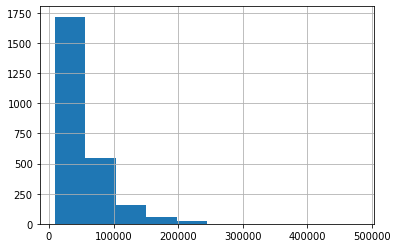

In [67]:
data['Price'].hist()

# Removing Outliers From Price Column 

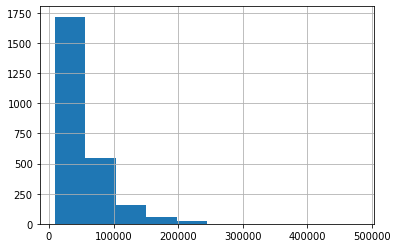

In [68]:
data['Price'].hist()

In [69]:
data[data['Price']>100000]

,Brand,Ram,Hdd,Price,Processor,Gen
16,Acer,16,128 + 1TB,106220.0,i7,1
47,Acer,16,256 + 1TB,173149.0,AMD,1
51,Acer,8,256,213543.0,i7,1
54,Acer,8,256 + 1TB,105039.0,i7,1
56,Acer,16,512,149527.0,i7,1
...,...,...,...,...,...,...
2572,Toshiba,8,256,102677.0,i7,1
2575,Toshiba,8,512,120787.0,i7,1
2580,Toshiba,16,1TB,192834.0,i7,1
2583,Toshiba,8,256,131653.0,i5,1


# Replacing the rows which are prices greater than 100000 to 100000

In [70]:
data.loc[data[data['Price']>100000].index,'Price']=100000


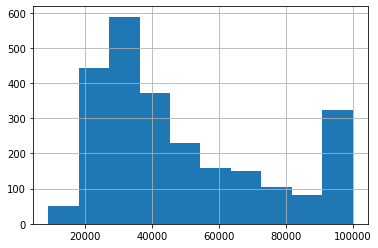

In [71]:
data['Price'].hist()

In [72]:
data=data.reset_index()

In [73]:
data.drop('index',inplace=True,axis=1)

In [74]:
data

,Brand,Ram,Hdd,Price,Processor,Gen
0,Acer,4,128,35354.0,i3,1
1,Acer,8,1TB,66614.0,i7,1
2,Acer,4,256,35512.0,AMD,1
3,Acer,8,1TB,58425.0,i7,1
4,Acer,4,1TB,47087.0,i3,1
...,...,...,...,...,...,...
2500,Dell,4,320,36273.0,i5,3
2501,Lenovo,2,160,24308.0,i5,1
2502,Lenovo,2,320,24308.0,i5,2
2503,Lenovo,2,320,24308.0,i5,3


In [75]:
datacopy=data

In [76]:
datacopy

,Brand,Ram,Hdd,Price,Processor,Gen
0,Acer,4,128,35354.0,i3,1
1,Acer,8,1TB,66614.0,i7,1
2,Acer,4,256,35512.0,AMD,1
3,Acer,8,1TB,58425.0,i7,1
4,Acer,4,1TB,47087.0,i3,1
...,...,...,...,...,...,...
2500,Dell,4,320,36273.0,i5,3
2501,Lenovo,2,160,24308.0,i5,1
2502,Lenovo,2,320,24308.0,i5,2
2503,Lenovo,2,320,24308.0,i5,3


# HYPOTHESIS TESTING

# Anova Test For Selecting The Predictive Variable

In [77]:
def FunctionAnova(inputData, targetVar,categoricalPredictors):
    from scipy.stats import f_oneway
    for cat in categoricalPredictors:
        CategoryGroupLists=inputData.groupby(cat)[targetVar].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        print(cat+'--> P-Value for Anova is: ', AnovaResults[1])

In [78]:
FunctionAnova(data,'Price',categoricalPredictors=['Brand', 'Ram', 'Hdd','Processor', 'Gen'])

Brand--> P-Value for Anova is:  3.8531019985030863e-53
Ram--> P-Value for Anova is:  0.0
Hdd--> P-Value for Anova is:  0.0
Processor--> P-Value for Anova is:  0.0
Gen--> P-Value for Anova is:  3.028321887174922e-30


# Creating Dummy Variables

In [79]:
data=pd.get_dummies(data)

In [80]:
data

,Price,Brand_Acer,Brand_Apple,Brand_Asus,Brand_Chuwi,Brand_Dell,Brand_Fujitsu,Brand_Google,Brand_HP,Brand_Hcl,...,Processor_i5,Processor_i7,Gen_1,Gen_2,Gen_3,Gen_4,Gen_5,Gen_6,Gen_7,Gen_8
0,35354.0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,66614.0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2,35512.0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,58425.0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
4,47087.0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2500,36273.0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2501,24308.0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2502,24308.0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2503,24308.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


# Creating a pickle File

In [81]:
data.to_pickle('Laptop_ML.pkl')

# Reading a Pickle File

In [82]:
dataml=pd.read_pickle('Laptop_ML.pkl')

In [83]:
dataml

,Price,Brand_Acer,Brand_Apple,Brand_Asus,Brand_Chuwi,Brand_Dell,Brand_Fujitsu,Brand_Google,Brand_HP,Brand_Hcl,...,Processor_i5,Processor_i7,Gen_1,Gen_2,Gen_3,Gen_4,Gen_5,Gen_6,Gen_7,Gen_8
0,35354.0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,66614.0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2,35512.0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,58425.0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
4,47087.0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2500,36273.0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2501,24308.0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2502,24308.0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2503,24308.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


# PCA

In [84]:
def automatedpca(data,tar):
    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt
    %matplotlib inline
    import pandas as pd
    import numpy as np
    TargetVariable=data[tar]
    OnlyPredictors=data.drop(tar, axis=1)
    a=len(data.columns)-1
    y = TargetVariable.values
    X = OnlyPredictors.values
    pca = PCA(n_components=a)
    pca_fit=pca.fit(X)
    reduced_X = pca_fit.transform(X)
    print(np.round(reduced_X[0:10],2))
    var_explained_cumulative=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
    print(var_explained_cumulative)
    plt.plot( range(1,(a+1)), var_explained_cumulative )
    plt.xlabel('Number of components')
    plt.ylabel('% Variance explained')

[[-0.44 -0.31  0.05 ...  0.   -0.   -0.  ]
 [ 1.2  -0.43 -0.21 ...  0.   -0.   -0.  ]
 [ 0.08 -0.43  0.51 ...  0.   -0.   -0.  ]
 ...
 [ 1.14 -0.12  0.73 ...  0.   -0.   -0.  ]
 [-0.08 -0.44  0.39 ...  0.   -0.   -0.  ]
 [-0.41 -0.35  0.04 ...  0.   -0.   -0.  ]]
[14.74 26.9  34.85 42.   48.46 53.51 57.82 61.82 65.55 68.9  71.54 73.65
 75.65 77.52 79.31 81.04 82.71 84.31 85.82 87.04 88.12 89.17 90.05 90.87
 91.57 92.26 92.92 93.54 94.13 94.7  95.25 95.76 96.2  96.56 96.85 97.13
 97.36 97.58 97.76 97.91 98.05 98.17 98.28 98.38 98.48 98.57 98.65 98.73
 98.8  98.87 98.93 98.99 99.04 99.09 99.13 99.17 99.21 99.24 99.27 99.3
 99.33 99.36 99.38 99.4  99.42 99.44 99.46 99.48 99.5  99.52 99.54 99.56
 99.58 99.6  99.61 99.62 99.63 99.64 99.65 99.66 99.67 99.68 99.69 99.7
 99.71 99.72 99.73 99.74 99.75 99.76 99.77 99.78 99.79 99.8  99.81 99.82
 99.83 99.84 99.85 99.86 99.87 99.88 99.89 99.9  99.91 99.92 99.93 99.94
 99.95 99.96 99.97 99.98 99.99 99.99 99.99 99.99 99.99 99.99 99.99 99.99]


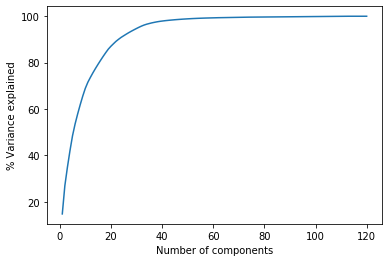

In [85]:
automatedpca(dataml,'Price')

In [86]:
def automatedpca2(data,tar):
    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt
    %matplotlib inline
    import pandas as pd
    import numpy as np
    TargetVariable=data[tar]
    OnlyPredictors=data.drop(tar, axis=1)
    a=len(data.columns)-1
    y = TargetVariable.values
    X = OnlyPredictors.values
    pca = PCA(n_components=40)
    pca_fit=pca.fit(X)
    reduced_X = pca_fit.transform(X)
    return reduced_X

In [87]:
datapca=automatedpca2(data,'Price')

In [88]:
datapca.shape

(2505, 40)

In [89]:
datapca=pd.DataFrame(datapca, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40'])

In [90]:
datapca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
0,-0.444780,-0.310574,0.049846,-0.696917,-0.614425,0.113889,0.538247,-0.044306,-0.013621,-0.419754,...,-0.461120,0.032647,-0.415888,-0.229589,-0.031750,0.008997,0.064327,0.015857,0.008180,0.004848
1,1.200910,-0.427143,-0.214255,-0.396036,-0.116915,0.468414,-0.065159,-0.157456,-0.271547,-0.173763,...,-0.213870,0.241233,-0.214598,-0.093809,-0.001570,-0.032719,-0.041830,0.050708,-0.004156,0.018990
2,0.079157,-0.430514,0.514327,-0.768717,-0.349801,-0.108354,-0.017558,-0.090251,-0.045201,-0.269501,...,-0.246854,0.369142,-0.075940,-0.113152,-0.109074,0.001125,0.065911,0.078302,0.001153,0.013493
3,1.200910,-0.427143,-0.214255,-0.396036,-0.116915,0.468414,-0.065159,-0.157456,-0.271547,-0.173763,...,-0.213870,0.241233,-0.214598,-0.093809,-0.001570,-0.032719,-0.041830,0.050708,-0.004156,0.018990
4,-0.406468,-0.348855,0.043215,-0.754619,-0.646334,0.132945,0.565129,-0.066202,-0.025379,-0.437592,...,-0.186360,0.272974,-0.129757,-0.120909,-0.079456,-0.019799,-0.009770,0.054267,-0.004590,-0.005395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2500,-0.220888,0.393596,0.994824,0.533231,-0.322972,0.446753,-0.032308,-0.262863,0.929809,-0.303976,...,-0.093476,0.184295,-0.117302,0.006305,0.018740,-0.027322,0.012144,-0.002744,0.028093,0.010450
2501,0.526151,-0.643296,0.563924,0.277278,0.255094,-0.415761,0.407401,0.990994,0.322806,-0.165470,...,-0.099748,-0.007385,0.139216,0.117252,-0.025015,0.001769,-0.097860,0.250985,0.823783,0.063292
2502,0.278235,-0.196005,0.308908,0.971303,0.287431,-0.194567,0.289217,1.160687,0.542696,-0.170707,...,-0.182288,0.174608,-0.123278,-0.033238,0.009494,-0.081389,-0.014144,-0.010363,0.005119,-0.024468
2503,0.202655,-0.108855,0.433981,1.088411,0.311347,0.046235,0.185333,1.117481,0.534866,-0.615200,...,-0.194419,0.206371,-0.113599,-0.017106,0.013043,-0.023141,-0.020659,-0.012204,0.010669,-0.019432


In [91]:
datafinal=datapca

In [92]:
datafinal

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
0,-0.444780,-0.310574,0.049846,-0.696917,-0.614425,0.113889,0.538247,-0.044306,-0.013621,-0.419754,...,-0.461120,0.032647,-0.415888,-0.229589,-0.031750,0.008997,0.064327,0.015857,0.008180,0.004848
1,1.200910,-0.427143,-0.214255,-0.396036,-0.116915,0.468414,-0.065159,-0.157456,-0.271547,-0.173763,...,-0.213870,0.241233,-0.214598,-0.093809,-0.001570,-0.032719,-0.041830,0.050708,-0.004156,0.018990
2,0.079157,-0.430514,0.514327,-0.768717,-0.349801,-0.108354,-0.017558,-0.090251,-0.045201,-0.269501,...,-0.246854,0.369142,-0.075940,-0.113152,-0.109074,0.001125,0.065911,0.078302,0.001153,0.013493
3,1.200910,-0.427143,-0.214255,-0.396036,-0.116915,0.468414,-0.065159,-0.157456,-0.271547,-0.173763,...,-0.213870,0.241233,-0.214598,-0.093809,-0.001570,-0.032719,-0.041830,0.050708,-0.004156,0.018990
4,-0.406468,-0.348855,0.043215,-0.754619,-0.646334,0.132945,0.565129,-0.066202,-0.025379,-0.437592,...,-0.186360,0.272974,-0.129757,-0.120909,-0.079456,-0.019799,-0.009770,0.054267,-0.004590,-0.005395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2500,-0.220888,0.393596,0.994824,0.533231,-0.322972,0.446753,-0.032308,-0.262863,0.929809,-0.303976,...,-0.093476,0.184295,-0.117302,0.006305,0.018740,-0.027322,0.012144,-0.002744,0.028093,0.010450
2501,0.526151,-0.643296,0.563924,0.277278,0.255094,-0.415761,0.407401,0.990994,0.322806,-0.165470,...,-0.099748,-0.007385,0.139216,0.117252,-0.025015,0.001769,-0.097860,0.250985,0.823783,0.063292
2502,0.278235,-0.196005,0.308908,0.971303,0.287431,-0.194567,0.289217,1.160687,0.542696,-0.170707,...,-0.182288,0.174608,-0.123278,-0.033238,0.009494,-0.081389,-0.014144,-0.010363,0.005119,-0.024468
2503,0.202655,-0.108855,0.433981,1.088411,0.311347,0.046235,0.185333,1.117481,0.534866,-0.615200,...,-0.194419,0.206371,-0.113599,-0.017106,0.013043,-0.023141,-0.020659,-0.012204,0.010669,-0.019432


In [93]:
datafinal['Price']=dataml['Price']

In [94]:
datafinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2505 entries, 0 to 2504
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     2505 non-null   float64
 1   PC2     2505 non-null   float64
 2   PC3     2505 non-null   float64
 3   PC4     2505 non-null   float64
 4   PC5     2505 non-null   float64
 5   PC6     2505 non-null   float64
 6   PC7     2505 non-null   float64
 7   PC8     2505 non-null   float64
 8   PC9     2505 non-null   float64
 9   PC10    2505 non-null   float64
 10  PC11    2505 non-null   float64
 11  PC12    2505 non-null   float64
 12  PC13    2505 non-null   float64
 13  PC14    2505 non-null   float64
 14  PC15    2505 non-null   float64
 15  PC16    2505 non-null   float64
 16  PC17    2505 non-null   float64
 17  PC18    2505 non-null   float64
 18  PC19    2505 non-null   float64
 19  PC20    2505 non-null   float64
 20  PC21    2505 non-null   float64
 21  PC22    2505 non-null   float64
 22  

# Splitting the data into training and testing

In [95]:
# Separate Target Variable and Predictor Variables
TargetVariable='Price'
Predictors=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40']
X=datafinal[Predictors].values
y=datafinal[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2004, 40)
(2004,)
(501, 40)
(501,)


In [97]:
X_test

array([[ 1.18055938e+00, -1.98853252e-01,  8.42577614e-01, ...,
        -6.48551210e-03, -4.93181501e-03, -8.26846924e-03],
       [-5.72125497e-01,  7.52613660e-01, -6.65951578e-01, ...,
         2.09786228e-02, -5.52029465e-03, -2.21349369e-02],
       [ 1.17238955e-01, -5.05807363e-01,  6.26037186e-01, ...,
        -5.35152844e-04, -7.17272227e-03, -2.48125577e-02],
       ...,
       [-5.63120703e-01,  5.10271516e-01, -3.34277509e-01, ...,
         2.28659637e-02, -1.81880544e-03, -3.00094684e-02],
       [-2.91802085e-01, -8.10364519e-01, -6.06832423e-01, ...,
         1.17817611e-02, -5.85110643e-03, -1.55215905e-02],
       [ 1.04425746e+00,  4.31984182e-01, -5.91747040e-01, ...,
         1.93062504e-02, -1.38473449e-03, -5.62413296e-03]])

# MULTIPLE LINEAR REGRESSION

In [98]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)

prediction=LREG.predict(X_test)
# print(prediction,"pre")
# print(y_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

# Measuring accuracy on Testing Data
print('Accuracy on Test Data:',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))


# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
TestingDataResults

LinearRegression()
R2 Value: 0.7994672571087242
Accuracy on Test Data: 81.58379265013637


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,Price,PredictedPrice
0,1.180559,-0.198853,0.842578,0.065333,0.099128,0.158492,0.717082,0.511287,-0.592749,-0.028374,...,0.008342,-0.018235,0.008583,-0.011906,0.021407,-0.006486,-0.004932,-0.008268,74724.0,76364.0
1,-0.572125,0.752614,-0.665952,0.011414,-1.065794,-0.565238,0.302946,-0.150524,-0.029963,-0.109213,...,0.011400,-0.017397,0.000003,0.002583,0.001503,0.020979,-0.005520,-0.022135,30500.0,29705.0
2,0.117239,-0.505807,0.626037,-0.741769,-0.470531,-0.005368,0.034316,0.691034,-0.257539,-0.067689,...,0.115292,-0.020019,-0.059125,0.024344,-0.007089,-0.000535,-0.007173,-0.024813,38503.0,45029.0
3,-0.026178,-1.260894,-0.336452,0.501269,0.146635,-0.949258,-0.199299,-0.200542,-0.104229,0.013404,...,-0.090685,-0.105180,-0.085395,0.057765,0.004806,0.036040,-0.001360,-0.016918,20500.0,20797.0
4,-1.356412,0.256721,-0.202038,0.038729,0.375170,0.653847,-0.083217,-0.217483,-0.305145,-0.392378,...,0.009821,0.003173,0.002227,-0.000214,0.013215,-0.006728,0.009802,0.003464,36000.0,35335.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,-0.235817,0.441547,0.799312,0.508907,-0.288561,0.040935,-0.128394,0.107310,0.426802,-0.540372,...,0.005000,-0.079070,-0.007145,-0.091585,0.023413,-0.025879,-0.003790,0.008168,35500.0,47570.0
497,-0.052825,-0.860505,-0.538833,-0.031288,0.097228,-0.156409,0.834727,0.254357,0.512517,-0.575895,...,-0.125562,-0.023196,0.015079,-0.024353,-0.003264,-0.013877,0.021890,-0.010602,32903.0,22778.0
498,-0.563121,0.510272,-0.334278,-1.147197,-0.003699,-0.256733,0.369203,0.010231,0.075106,-0.147162,...,-0.009264,-0.008253,-0.027404,0.018504,0.005693,0.022866,-0.001819,-0.030009,32000.0,33947.0
499,-0.291802,-0.810365,-0.606832,1.196697,0.212644,-0.711857,-0.395451,-0.062190,0.022057,0.189330,...,0.016267,-0.008503,-0.000509,-0.050702,0.015108,0.011782,-0.005851,-0.015522,20499.0,21436.0


XGBRegressor(base_score=None, booster='gbtree', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=None, max_depth=2,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=None)
[21:34:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,Price,PredictedPrice
0,1.180559,-0.198853,0.842578,0.065333,0.099128,0.158492,0.717082,0.511287,-0.592749,-0.028374,...,0.008342,-0.018235,0.008583,-0.011906,0.021407,-0.006486,-0.004932,-0.008268,74724.0,82133.0
1,-0.572125,0.752614,-0.665952,0.011414,-1.065794,-0.565238,0.302946,-0.150524,-0.029963,-0.109213,...,0.011400,-0.017397,0.000003,0.002583,0.001503,0.020979,-0.005520,-0.022135,30500.0,31118.0
2,0.117239,-0.505807,0.626037,-0.741769,-0.470531,-0.005368,0.034316,0.691034,-0.257539,-0.067689,...,0.115292,-0.020019,-0.059125,0.024344,-0.007089,-0.000535,-0.007173,-0.024813,38503.0,34191.0
3,-0.026178,-1.260894,-0.336452,0.501269,0.146635,-0.949258,-0.199299,-0.200542,-0.104229,0.013404,...,-0.090685,-0.105180,-0.085395,0.057765,0.004806,0.036040,-0.001360,-0.016918,20500.0,19038.0
4,-1.356412,0.256721,-0.202038,0.038729,0.375170,0.653847,-0.083217,-0.217483,-0.305145,-0.392378,...,0.009821,0.003173,0.002227,-0.000214,0.013215,-0.006728,0.009802,0.003464,36000.0,39725.0


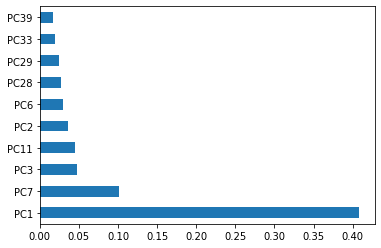

In [99]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2, learning_rate=0.1, n_estimators=1000, objective='reg:linear', booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
TestingDataResults.head()

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1),
                  learning_rate=0.1, n_estimators=500)
R2 Value: 0.5390677284140879
Accuracy 66.65447273657261


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,Price,PredictedPrice
0,1.180559,-0.198853,0.842578,0.065333,0.099128,0.158492,0.717082,0.511287,-0.592749,-0.028374,...,0.008342,-0.018235,0.008583,-0.011906,0.021407,-0.006486,-0.004932,-0.008268,74724.0,76548.0
1,-0.572125,0.752614,-0.665952,0.011414,-1.065794,-0.565238,0.302946,-0.150524,-0.029963,-0.109213,...,0.011400,-0.017397,0.000003,0.002583,0.001503,0.020979,-0.005520,-0.022135,30500.0,40141.0
2,0.117239,-0.505807,0.626037,-0.741769,-0.470531,-0.005368,0.034316,0.691034,-0.257539,-0.067689,...,0.115292,-0.020019,-0.059125,0.024344,-0.007089,-0.000535,-0.007173,-0.024813,38503.0,40141.0
3,-0.026178,-1.260894,-0.336452,0.501269,0.146635,-0.949258,-0.199299,-0.200542,-0.104229,0.013404,...,-0.090685,-0.105180,-0.085395,0.057765,0.004806,0.036040,-0.001360,-0.016918,20500.0,40141.0
4,-1.356412,0.256721,-0.202038,0.038729,0.375170,0.653847,-0.083217,-0.217483,-0.305145,-0.392378,...,0.009821,0.003173,0.002227,-0.000214,0.013215,-0.006728,0.009802,0.003464,36000.0,40141.0


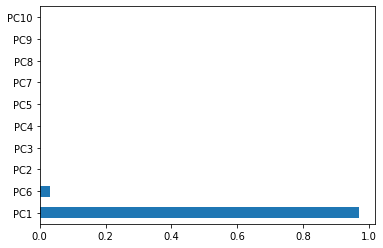

In [100]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 1 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=1)
RegModel = AdaBoostRegressor(n_estimators=500, base_estimator=DTR ,learning_rate=0.1)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
TestingDataResults.head()

DecisionTreeRegressor(max_depth=1)
R2 Value: 0.5519467945692635
Accuracy 70.43355237150888


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,Price,PredictedPrice
0,1.180559,-0.198853,0.842578,0.065333,0.099128,0.158492,0.717082,0.511287,-0.592749,-0.028374,...,0.008342,-0.018235,0.008583,-0.011906,0.021407,-0.006486,-0.004932,-0.008268,74724.0,77649.0
1,-0.572125,0.752614,-0.665952,0.011414,-1.065794,-0.565238,0.302946,-0.150524,-0.029963,-0.109213,...,0.011400,-0.017397,0.000003,0.002583,0.001503,0.020979,-0.005520,-0.022135,30500.0,36418.0
2,0.117239,-0.505807,0.626037,-0.741769,-0.470531,-0.005368,0.034316,0.691034,-0.257539,-0.067689,...,0.115292,-0.020019,-0.059125,0.024344,-0.007089,-0.000535,-0.007173,-0.024813,38503.0,36418.0
3,-0.026178,-1.260894,-0.336452,0.501269,0.146635,-0.949258,-0.199299,-0.200542,-0.104229,0.013404,...,-0.090685,-0.105180,-0.085395,0.057765,0.004806,0.036040,-0.001360,-0.016918,20500.0,36418.0
4,-1.356412,0.256721,-0.202038,0.038729,0.375170,0.653847,-0.083217,-0.217483,-0.305145,-0.392378,...,0.009821,0.003173,0.002227,-0.000214,0.013215,-0.006728,0.009802,0.003464,36000.0,36418.0


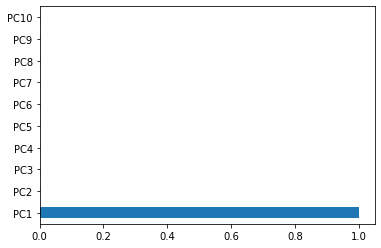

In [101]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=1,criterion='mse')

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
TestingDataResults.head()

RandomForestRegressor(max_depth=2)
R2 Value: 0.6670059863467392
Accuracy 75.47933153996476


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,Price,PredictedPrice
0,1.180559,-0.198853,0.842578,0.065333,0.099128,0.158492,0.717082,0.511287,-0.592749,-0.028374,...,0.008342,-0.018235,0.008583,-0.011906,0.021407,-0.006486,-0.004932,-0.008268,74724.0,72371.0
1,-0.572125,0.752614,-0.665952,0.011414,-1.065794,-0.565238,0.302946,-0.150524,-0.029963,-0.109213,...,0.011400,-0.017397,0.000003,0.002583,0.001503,0.020979,-0.005520,-0.022135,30500.0,34826.0
2,0.117239,-0.505807,0.626037,-0.741769,-0.470531,-0.005368,0.034316,0.691034,-0.257539,-0.067689,...,0.115292,-0.020019,-0.059125,0.024344,-0.007089,-0.000535,-0.007173,-0.024813,38503.0,44171.0
3,-0.026178,-1.260894,-0.336452,0.501269,0.146635,-0.949258,-0.199299,-0.200542,-0.104229,0.013404,...,-0.090685,-0.105180,-0.085395,0.057765,0.004806,0.036040,-0.001360,-0.016918,20500.0,31728.0
4,-1.356412,0.256721,-0.202038,0.038729,0.375170,0.653847,-0.083217,-0.217483,-0.305145,-0.392378,...,0.009821,0.003173,0.002227,-0.000214,0.013215,-0.006728,0.009802,0.003464,36000.0,34826.0


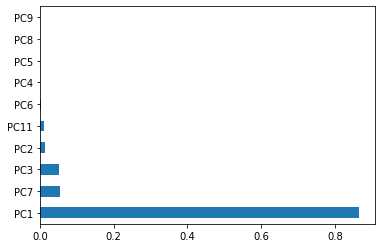

In [102]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=2, n_estimators=100,criterion='mse')

# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
TestingDataResults.head()

# Saving The XG Boost Model 

In [103]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final ZomatoRatingModel
with open('FinalXGBoostModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(XGB, fileWriteStream)
    # Don't forget toa close the filestream!
    fileWriteStream.close()

# Reading XG Model 

In [104]:
import pickle
with open('FinalXGBoostModel.pkl', 'rb') as fileReadStream:
    XGBoost_model=pickle.load(fileReadStream)
    # Don't forget to close the filestream!
    fileReadStream.close()

[21:34:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [105]:
XGBoost_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [106]:
datacopy.drop('Price',inplace=True,axis=1)

In [107]:
datacopy

,Brand,Ram,Hdd,Processor,Gen
0,Acer,4,128,i3,1
1,Acer,8,1TB,i7,1
2,Acer,4,256,AMD,1
3,Acer,8,1TB,i7,1
4,Acer,4,1TB,i3,1
...,...,...,...,...,...
2500,Dell,4,320,i5,3
2501,Lenovo,2,160,i5,1
2502,Lenovo,2,320,i5,2
2503,Lenovo,2,320,i5,3


In [ ]:
from tkinter import *
from tkinter import ttk
import random
import numpy
import pandas as pd
root = Tk()
root.title('Laptop Price Pediction')
root.geometry('850x650')
root.configure(background="#E5E8E8")
var = StringVar()
label = Label( root, textvariable = var,font=('arial',20,'bold'),bd=20,background="#E5E8E8")
var.set('Laptop Price Prediction')
label.grid(row=0,columnspan=6)

#########################################################################################
label_1 = ttk.Label(root, text ='Brand',font=("Helvetica", 16),background="#E5E8E8")
label_1.grid(row=11,column=0)
    
brand= StringVar(root)

# Dictionary with options
brandChoices = {'Acer', 'Apple', 'Asus', 'Chuwi', 'Dell', 'Lenovo', 'Fujitsu',
       'Google', 'Hcl', 'HP', 'Huawei', 'Lg', 'Mediacom', 'Micromax',
       'Msi', 'Razer', 'Samsung', 'Sony', 'Toshiba', 'Venturer', 'Vero',
       'Wipro', 'Xiaomi'}
brand.set('Acer') # set the default option
popupMenu = OptionMenu(root, brand, *brandChoices)
popupMenu.grid(row = 11, column = 1)

# on change dropdown value
def change_dropdown(*args):
    print( brand.get() )

# link function to change dropdown
brand.trace('w', change_dropdown)



######################################################################
label_2 = ttk.Label(root, text ='Ram',font=("Helvetica", 16),background="#E5E8E8")
label_2.grid(row=12,column=0)

#2 RAM 

ram= StringVar(root)

# Dictionary with options
ramChoices = {'2','3','4','6','8','12','16','24','32'}
ram.set('2') # set the default option
popupMenu = OptionMenu(root, ram, *ramChoices)
popupMenu.grid(row = 12, column = 1)

# on change dropdown value
def change_dropdown(*args):
    print( ram.get() )

# link function to change dropdown
ram.trace('w', change_dropdown)
    
    
    
    
#############################################################   
    
    
label_3 = ttk.Label(root, text ='HDD',font=("Helvetica", 16),background="#E5E8E8")
label_3.grid(row=13,column=0)


#3 HDD

hdd= StringVar(root)

# Dictionary with options
hddChoices = {'128', '1TB ', '256', '500', '32', '128  +  1TB ', '256  +  1TB ',
       '320', '512', '750', 'Intel HD Graphics 5000',
       'Intel Iris Pro Graphics', 'Intel Iris Graphics 6100',
       'Intel HD Graphics 2500', 'Intel HD Graphics 5300',
       'Intel HD Graphics 5500', '250', '1 TB ',
       '11.6 inches, 1366 x 768 pixels Screen', '512  +  2TB ', '640',
       'Intel HD Graphics', 'Intel Integrated 500',
       '8  NVIDIA Graphics Ca', '2TB ', '256  +  256 ',
       'Intel Integrated HD', '160', '16', '1.5 TB ', '64',
       'Intel Integrated HD Graphics', 'Intel HD', 'intel HD', '4',
       '512  +  256 ', '80', '1TB', '1.0TB Hybrid', '128  +  2TB ',
       'Intel HD Graphics 520', '2 TB ', '512 SSD', '256 SSD +  256 SSD',
       '256  +  500 ', '64  +  1TB ', '60', '30', '256  +  2TB ', '300',
       '200', 'Intel Integrated NA', 'Intel Iris Graphics',
       '2  NVIDIA Graphics Ca', '4  NVIDIA Graphics Ca',
       'Intel HD Graphics 620', 'AMD Radeon R4',
       '13.3 inches, 1920 x 1080 pixels Screen', 'Intel HD Graphics 4200',
       'Intel Hd Graphics 4400', '360', '180', '1TB  +  1TB ',
       '512  +  1TB ', '512  +  512 ', 'Intel HD Graphics 4400',
       'Intel HD Graphics 400', 'Intel HD Graphics 12 Core GPU',
       '10.1 inches, 1280 x 800 pixels, Touch Screen', '62',
       'Intel HD Graphics 4000', 'Integrated'}
hdd.set('128') # set the default option
popupMenu = OptionMenu(root, hdd,*hddChoices)
popupMenu.grid(row = 13, column = 1)

# on change dropdown value
def change_dropdown(*args):
    print( hdd.get() )

# link function to change dropdown
hdd.trace('w', change_dropdown)
    

####################################################    
    
label_4 = ttk.Label(root, text ='Processor',font=("Helvetica", 16),background="#E5E8E8")
label_4.grid(row=14,column=0)
    

#4 Processor

processor= StringVar(root)

# Dictionary with options
processorChoices = {'i3', 'i7', 'AMD', 'Pentium4', 'i5', 'Dual Core', 'Core2 Duo','Centrino'}
processor.set('2') # set the default option
popupMenu = OptionMenu(root, processor, *processorChoices)
popupMenu.grid(row = 14, column = 1)

# on change dropdown value
def change_dropdown(*args):
    print( processor.get() )

# link function to change dropdown
processor.trace('w', change_dropdown)


###################################################################

label_5 = ttk.Label(root, text ='Gen',font=("Helvetica", 16),background="#E5E8E8")
label_5.grid(row=15,column=0)

#5 Gen


gen= StringVar(root)

# Dictionary with options
genChoices = {'1', '2', '3', '4', '6', '5', '7', '8'}
gen.set('1') # set the default option
popupMenu = OptionMenu(root, gen, *genChoices)
popupMenu.grid(row = 15, column = 1)

# on change dropdown value
def change_dropdown(*args):
    print( gen.get() )

# link function to change dropdown
gen.trace('w', change_dropdown)

####################################



def predict():
    
    label_out = ttk.Label(root, text ='      sp     ',font=("Helvetica", 18),background="#E5E8E8")
    label_out.grid(row=21,column=1)
    
    Brand=brand.get()
    Ram=ram.get()
    Hdd=hdd.get()
    Processor=processor.get()
    Gen=gen.get()
    
    
    datacopy.iloc[0] = [Brand,Ram,Hdd,Processor,Gen]
    
    datadummy=pd.get_dummies(datacopy)
    
    
    
    from sklearn.decomposition import PCA
    pca = PCA(n_components=40)
    pca_fit=pca.fit(datadummy)
    reduced_X = pca_fit.transform(datadummy)
    
    finaldf=pd.DataFrame(reduced_X, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40'])
    
    predicted=XGBoost_model.predict(finaldf.iloc[0])
    
    
    
    label_out = ttk.Label(root, text =str(predicted[0])+str('$'),font=("Helvetica", 18),background="#E5E8E8")
    label_out.grid(row=21,column=1)
    

    
    
b1 = Button(root, text = 'Predict',font=("Helvetica", 16),background="white",command = predict)
b1.grid(row=21,column=0)


    
root.mainloop()

Samsung
32
Intel HD Graphics 400
i7
7
